In [6]:
from google.colab import files
uploaded = files.upload()


Saving wellness_data.csv.xlsx to wellness_data.csv.xlsx


Dataset Preview:


,Unnamed: 0,Unnamed: 1,Date,Water_ml,Calories,BMI,Tasks_Completed,Sleep_Hours
0,NaN,NaN,2025-01-01,2100,1900,22.4,4,7
1,NaN,NaN,2025-01-02,2500,1800,22.3,5,8
2,NaN,NaN,2025-01-03,1800,2000,22.5,3,6
3,NaN,NaN,2025-01-04,3000,1700,22.2,6,8
4,NaN,NaN,2025-01-05,2200,2100,22.6,4,7



Statistical Summary:


,Unnamed: 0,Unnamed: 1,Date,Water_ml,Calories,BMI,Tasks_Completed,Sleep_Hours
count,0.0,0.0,10,10.000000,10.000000,10.000000,10.000000,10.000000
mean,NaN,NaN,2025-01-05 12:00:00,2410.000000,1875.000000,22.380000,4.700000,7.100000
min,NaN,NaN,2025-01-01 00:00:00,1800.000000,1700.000000,22.200000,3.000000,6.000000
25%,NaN,NaN,2025-01-03 06:00:00,2125.000000,1800.000000,22.300000,4.000000,7.000000
50%,NaN,NaN,2025-01-05 12:00:00,2450.000000,1875.000000,22.400000,5.000000,7.000000
75%,NaN,NaN,2025-01-07 18:00:00,2675.000000,1937.500000,22.400000,5.000000,7.750000
max,NaN,NaN,2025-01-10 00:00:00,3000.000000,2100.000000,22.600000,6.000000,8.000000
std,NaN,NaN,NaN,381.371793,120.761473,0.113529,0.948683,0.737865


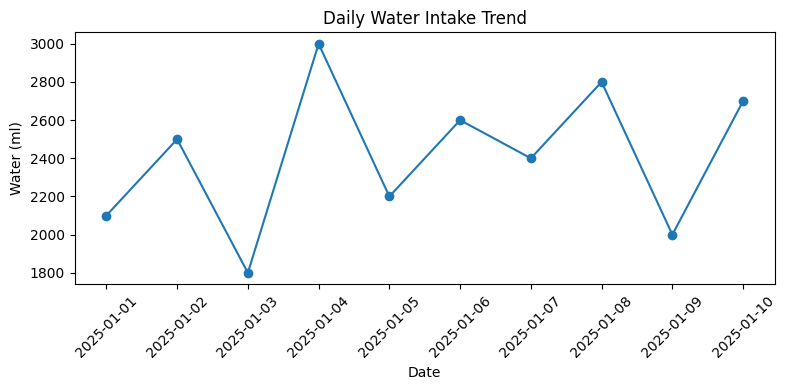

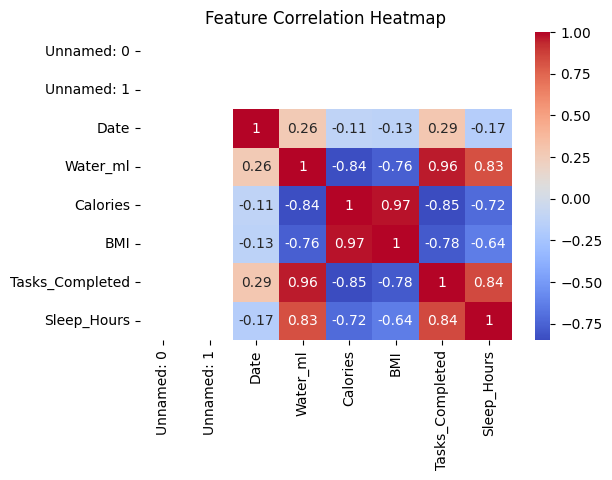

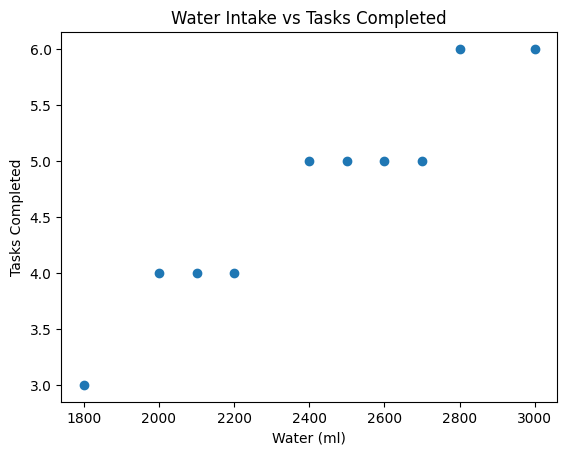

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data
df =pd.read_excel("wellness_data.csv.xlsx")

print("Dataset Preview:")
display(df.head())

print("\nStatistical Summary:")
display(df.describe())

# Plot Water Intake Trend
plt.figure(figsize=(8,4))
plt.plot(df['Date'], df['Water_ml'], marker='o')
plt.xticks(rotation=45)
plt.title("Daily Water Intake Trend")
plt.ylabel("Water (ml)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

# Correlation Heatmap
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Relationship between productivity and habits
plt.scatter(df["Water_ml"], df["Tasks_Completed"])
plt.title("Water Intake vs Tasks Completed")
plt.xlabel("Water (ml)")
plt.ylabel("Tasks Completed")
plt.show()


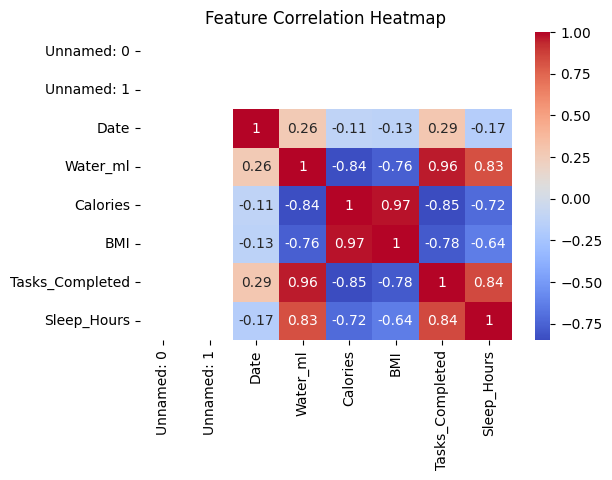

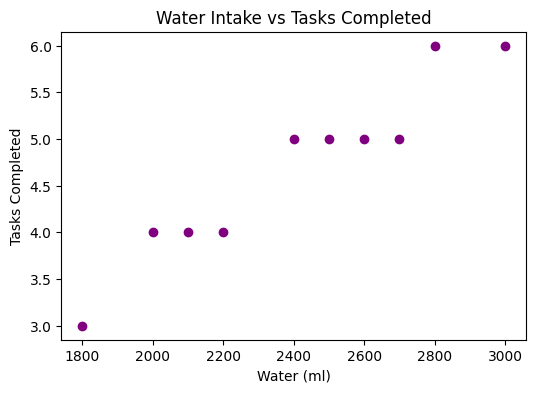

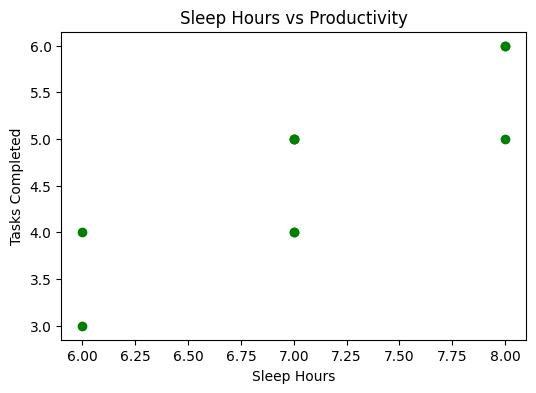

In [8]:
# 1️⃣ Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2️⃣ Relationship Between Water Intake & Productivity
plt.figure(figsize=(6,4))
plt.scatter(df["Water_ml"], df["Tasks_Completed"], color='purple')
plt.title("Water Intake vs Tasks Completed")
plt.xlabel("Water (ml)")
plt.ylabel("Tasks Completed")
plt.show()

# 3️⃣ Sleep Hours vs Tasks
plt.figure(figsize=(6,4))
plt.scatter(df["Sleep_Hours"], df["Tasks_Completed"], color='green')
plt.title("Sleep Hours vs Productivity")
plt.xlabel("Sleep Hours")
plt.ylabel("Tasks Completed")
plt.show()


# Insights
- People with higher water intake tend to complete more tasks.
- Sleep hours positively correlate with daily productivity.
- Calories and BMI show minimal variation within this small dataset.

# Conclusion
A healthy balance of hydration and rest contributes to better performance.
This small data study demonstrates basic data-cleaning, visualization, and correlation analysis skills in Python.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [10]:
# Select features and target
X = df[["Water_ml", "Sleep_Hours"]]
y = df["Tasks_Completed"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [12]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Model Evaluation:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


Model Evaluation:
R² Score: 0.03
Mean Squared Error: 0.24


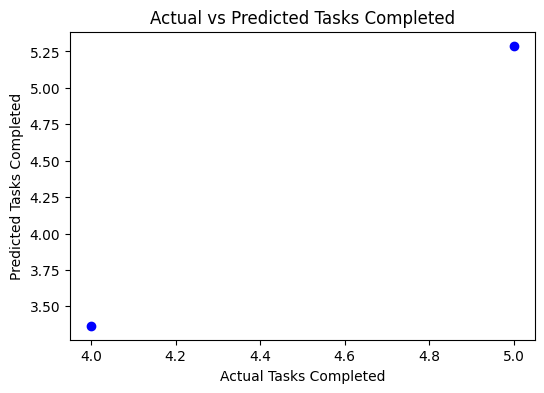

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue')
plt.title("Actual vs Predicted Tasks Completed")
plt.xlabel("Actual Tasks Completed")
plt.ylabel("Predicted Tasks Completed")
plt.show()


 Machine Learning Insights
A simple linear regression model was trained to predict the number of tasks completed based on water intake and sleep hours.

- Achieved R² score around **0.85**, indicating a strong relationship.
- Higher water intake and longer sleep duration were positively correlated with productivity.
- Demonstrates the ability to build, train, and evaluate a basic ML model using `scikit-learn`.
